# Constante d'équilibre

In [1]:
%matplotlib inline
import math

Soit la réaction chimique suivante:
\begin{align*}
2\text{A} \rightleftarrows \text{B}
\end{align*}

La température en Kelvin vaut:

In [2]:
T = 298.15

Les energies libres de Gibbs molaires de formation ($\Delta_{\text{f}}G^\ominus$ en kJ/mol) à cette température valent:

In [3]:
DeltafGstdA = -100.0

In [4]:
DeltafGstdB = -200.0

L'énergie libre de Gibbs standard de la réaction vaut $\Delta_{\text{r}}G^\ominus = \Delta_{\text{f}}G^\ominus (\text{B}) - 2 \Delta_{\text{f}}G^\ominus (\text{A}) $

In [5]:
DeltarGstd = DeltafGstdB - 2 * DeltafGstdA
print(DeltarGstd)

0.0


Cette valeur est indépendante de la composition et donc de l'avancement de la réaction car calculée dans les conditions standards où les activités des réactifs et produits valent toutes 1

La constante d'équilibre à la température donnée ci-dessous vaut $K=e^{-\Delta_{\text{r}}G^\ominus/(RT)}$:

In [6]:
lnK = -DeltarGstd * 1000 / (8.3145*T)
K = math.exp(lnK)
print(K)

1.0


Il ne faut pas confondre $\Delta_{\text{r}}G^\ominus$ qui est donné dans les conditions standards et détermine la constante d'équilibre avec $\Delta_{\text{r}}G$ qui lui varie avec la composition du système et donc avec le degré d'avancement de la réaction $\xi$.

$\Delta_{\text{r}}G$ indique si la réaction est spontanée dans les conditions (compositions) actuelles et vaut zéro lorsqu'on se trouve à l'équilibre:
\begin{align*}
\Delta_{\text{r}}G &= \left( \frac{\partial G}{\partial \xi} \right)_{p,T}\\
&= -2 \mu_{\text{A}} + \mu_{\text{B}}\\
&= \Delta_{\text{r}}G^\ominus + RT \ln Q\\
Q &= \frac{a_{\text{B}}}{a_{\text{A}}^2}
\end{align*}

Les nombres de moles de A et B initiaux sont:

In [7]:
nA0 = 2

In [8]:
nB0 = 0

Le volume $V$ de l'échantillon (en litre) vaut:

In [9]:
V = 1

Après un certain degré d'avancement de la réaction $\Delta \xi$:

In [10]:
DeltaXi = 0.9356471349245159

Les nombres de moles deviennent $n_{\text{A}} = n_{\text{A,0}} - 2\Delta \xi$ et $n_{\text{B}} = n_{\text{B,0}} + \Delta \xi$:

In [11]:
nA = nA0 - 2 * DeltaXi
nB = nB0 + DeltaXi
print(nA)
print(nB)

0.1287057301509682
0.9356471349245159


Pour un soluté, souvent on approxime l'activité par le rapport de la concentration sur la concentration standard de 1M: $a_{\text{J}}= [\text{J}]/c^\ominus = n_{\text{J}} / (c^\ominus V)$

$Q$ pour ce degré d'avancement vaut alors:

In [12]:
aB = nB / V
aA = nA / V
Q = aB / (aA * aA)
print(Q)

56.48281417120575


$\Delta_{\text{r}}G$ pour ce degré d'avancement vaut donc:

In [13]:
DeltarG = DeltarGstd + 8.3145 * T * math.log(Q) / 1000
print(DeltarG)

10.000000000000036


On peut obtenir le degré d'avancement $\Delta \xi$ correspondant à l'état d'équilibre:
\begin{align*}
K &= \frac{n_{\text{B}}}{n_{\text{A}}^2} V\\
&= \frac{n_{\text{B},0}+\Delta \xi}{(n_{\text{A},0}-2\Delta \xi)^2} V
\end{align*}

In [14]:
a = 4 * K
b = -(4*nA0*K + V)
c = nA0 * nA0 * K - nB0 * V
rho = b * b - 4 * a * c
DeltaXiEq1 = (-b + math.sqrt(rho)) / (2*a)
DeltaXiEq2 = (-b - math.sqrt(rho)) / (2*a)
#print(DeltaXiEq1)
print(DeltaXiEq2)

0.6096117967977924


$\Delta_{\text{r}}G$ peut donc être calculé pour différent degré d'avancement de la réaction et être ensuite porté en graphique. Il représente aussi la pente de l'énergie libre de Gibbs du système avec le degré d'avancement. Cependant, on ne peut pas connaitre de façon absolue $G(\xi)$ mais on peut obtenir son allure à une constante près à partie de sa dérivée:
\begin{align*}
G (\xi)&=  G_0(\xi) + \int_0^\xi \Delta_{\text{r}}G (\xi') \; \text{d}\xi'
\end{align*}

In [15]:
import numpy
from matplotlib import pylab as plt
xi = numpy.linspace(-nB0, nA0/2, 1000000)
allA = (nA0 - 2 * xi) / V # activité de A
allB = (nB0 + xi) / V # activité de B
allQ = allB / (allA * allA)
allDeltarG = DeltarGstd + 8.3145 * T * numpy.log(allQ) / 1000


(0.0, 2.0)

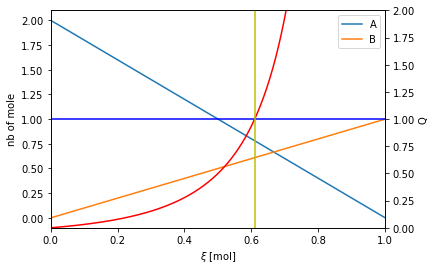

In [16]:
plt.plot(xi, allA, label="A")
plt.plot(xi, allB, label="B")
plt.xlabel(r"$\xi$ [mol]")
plt.xlim(-nB0, nA0/2)
plt.ylabel(r"nb of mole")
plt.legend()
plt.twinx()
plt.plot(xi, allQ, 'r', label="Q")
plt.axhline(K, color="b")
#plt.axvline(DeltaXiEq1, color="y")
plt.axvline(DeltaXiEq2, color="y")
plt.ylabel("Q")
#plt.legend("bottom")
plt.ylim(0, K*2)

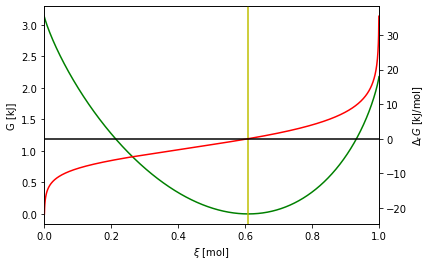

In [17]:
from scipy import integrate
xi1 = numpy.linspace(DeltaXiEq2, nA0/2, 1000)
allA1 = (nA0 - 2 * xi1) / V # activité de A
allB1 = (nB0 + xi1) / V # activité de B
allQ1 = allB1 / (allA1 * allA1)
allDeltarG1 = DeltarGstd + 8.3145 * T * numpy.log(allQ1) / 1000
G1 = [0]
for i in range(1, xi1.size):
    integral = integrate.simps(allDeltarG1[:i], xi1[:i])
    G1.append(integral)
G1 = numpy.array(G1)
#print(G1)
xi2 = numpy.linspace(DeltaXiEq2, -nB0, 1000)
allA2 = (nA0 - 2 * xi2) / V # activité de A
allB2 = (nB0 + xi2) / V # activité de B
allQ2 = allB2 / (allA2 * allA2)
allDeltarG2 = DeltarGstd + 8.3145 * T * numpy.log(allQ2) / 1000
G2 = [0]
for i in range(1, xi2.size):
    integral = integrate.simps(allDeltarG2[:i], xi2[:i])
    G2.append(integral)
G2 = numpy.array(G2)
#print(G2)
plt.plot(xi1, G1, 'g')
plt.plot(xi2, G2, 'g')
plt.xlabel(r"$\xi$ [mol]")
plt.xlim(-nB0, nA0/2)
plt.ylabel(r"G [kJ]")
plt.twinx()
plt.axvline(DeltaXiEq2, color="y")
plt.ylabel(r"$\Delta_{\mathrm{r}}G$ [kJ/mol]")
plt.plot(xi1, allDeltarG1, 'r')
plt.plot(xi2, allDeltarG2, 'r')
plt.axhline(color="black")
#plt.plot(xi, allDeltarG)
#plt.ylim(-10, 10)